In [220]:
import sys
print('Python: {}'.format(sys.version))
import scipy
print('scipy: {}'.format(scipy.__version__))
import numpy as np
print('numpy: {}'.format(numpy.__version__))
import matplotlib
import matplotlib.pyplot as plt
print('matplotlib: {}'.format(matplotlib.__version__))
import pandas as pd
print('pandas: {}'.format(pandas.__version__))
import sklearn 
print('sklearn: {}'.format(sklearn.__version__))
import seaborn as sns
print('seaborn: {}'.format(sns.__version__))

Python: 3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
scipy: 1.4.1
numpy: 1.18.5
matplotlib: 3.2.2
pandas: 1.0.5
sklearn: 0.22.2.post1
seaborn: 0.10.1


In [221]:
#import libraries
import io
import math
from pandas import read_csv
from pandas.plotting import scatter_matrix
import pandas.util.testing as tm
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [222]:
#Load datasets
titanic_data=pd.read_csv("https://raw.githubusercontent.com/TracyRenee61/Titanic-Datasets/master/titanic_train.csv")
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [223]:
titanic_data.shape

(891, 12)

In [224]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [225]:
titanic_data.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

In [226]:
test_data = pd.read_csv("https://raw.githubusercontent.com/TracyRenee61/Titanic-Datasets/master/titanic_test.csv")
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [227]:
titanic_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [228]:
women=titanic_data.loc[titanic_data.Sex=='female']["Survived"]
rate_women=sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [229]:
men = titanic_data.loc[titanic_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [230]:
#prepare data
y = titanic_data["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(titanic_data[features])
X_test = pd.get_dummies(test_data[features])

In [231]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [232]:
print(X)

     Pclass  SibSp  Parch  Sex_female  Sex_male
0         3      1      0           0         1
1         1      1      0           1         0
2         3      0      0           1         0
3         1      1      0           1         0
4         3      0      0           0         1
..      ...    ...    ...         ...       ...
886       2      0      0           0         1
887       1      0      0           1         0
888       3      1      2           1         0
889       1      0      0           0         1
890       3      0      0           0         1

[891 rows x 5 columns]


In [233]:
print(X_test)

     Pclass  SibSp  Parch  Sex_female  Sex_male
0         3      0      0           0         1
1         3      1      0           1         0
2         2      0      0           0         1
3         3      0      0           0         1
4         3      1      1           1         0
..      ...    ...    ...         ...       ...
413       3      0      0           0         1
414       1      0      0           1         0
415       3      0      0           0         1
416       3      0      0           0         1
417       3      1      1           0         1

[418 rows x 5 columns]


In [234]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.50, random_state=1)

In [235]:
#build models
# Spot Check Algorithms
models = []
models.append(('RFC',RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)))
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

RFC: 0.808838 (0.054316)
LR: 0.829040 (0.044958)
LDA: 0.822323 (0.054444)
KNN: 0.790707 (0.053856)
CART: 0.797525 (0.049490)
NB: 0.831263 (0.050516)
SVM: 0.833586 (0.046932)


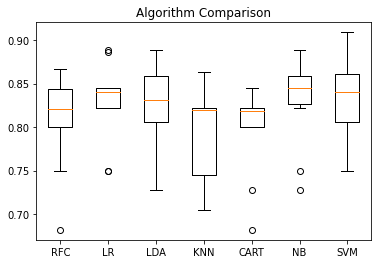

In [236]:
# Compare Algorithms
matplotlib.pyplot.boxplot(results, labels=names)
matplotlib.pyplot.title('Algorithm Comparison')
matplotlib.pyplot.show()

In [237]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X, y)
predictions = model.predict(X_test)

In [238]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [239]:
#upload submission
my_submission = pd.read_csv("my_submission.csv")
my_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
